In [139]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [140]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [141]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [142]:
# Create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [143]:
# Reflect an existing database into a new model

# Reflect Database into ORM classes
# reflect the tables
Base = automap_base()
Base.prepare(autoload_with=engine)


In [144]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [145]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [146]:
# Create our session (link) from Python to the DB
session = Session(engine)

conn = engine.connect()

In [147]:
# Create a database session object
# Query All Records in the the Database
Measurement_data = pd.read_sql("SELECT * FROM Measurement", conn)
Station_data = pd.read_sql("SELECT * FROM Station", conn)

In [148]:
#Checking import of data
Measurement_data.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [181]:
#Checking import of data
Station_data.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


# Exploratory Precipitation Analysis

In [150]:
# Find the most recent date in the data set.
##HINT Don’t pass the date as a variable to your query.
latest_date = Measurement_data.date.max()
latest_date

'2017-08-23'

In [151]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.

date_range = (dt.date(2017,8,23)) - (dt.timedelta(days=365))
print(date_range)

# Calculate the date one year from the last date in data set.
#'2017-08-23' minus one year is 2016-8-23


2016-08-23


In [213]:
# Perform a query to retrieve the data and precipitation scores
precip_scores = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= date_range)
#Check
precip_scores.first()

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_score_pd = pd.DataFrame(precip_scores)
precip_score_pd.head()


,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [194]:
# Sort the dataframe by date

precip_score_pd['date'] = pd.to_datetime(precip_score_pd['date'])
precip_pd = precip_score_pd.sort_values(by=['date'])
precip_pd.head(10)




,date,prcp
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
1881,2016-08-23,0.70
1192,2016-08-23,0.02
1,2016-08-24,0.08
1530,2016-08-24,2.15
705,2016-08-24,2.28


In [196]:
precip_pd = precip_pd.set_index(precip_pd['date'])
precip_pd.head()

,date,prcp
date,,
2016-08-23,2016-08-23,0.00
2016-08-23,2016-08-23,NaN
2016-08-23,2016-08-23,1.79
2016-08-23,2016-08-23,0.05
2016-08-23,2016-08-23,0.15


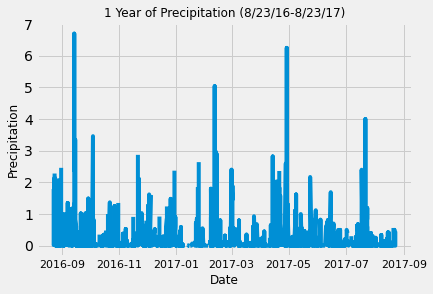

In [211]:
# Use Pandas Plotting with Matplotlib to plot the data

plt.plot(precip_pd.prcp)

fontsize = 12
plt.xlabel('Date', fontsize=fontsize)
plt.ylabel('Precipitation', fontsize=fontsize)
plt.title('1 Year of Precipitation (8/23/16-8/23/17)', fontsize=fontsize)
plt.xticks(fontsize = (fontsize-1))


plt.show()

In [68]:
# Use Pandas to calculate the summary statistics for the precipitation data
Measurement_data.describe()

,id,prcp,tobs
count,19550.000000,18103.000000,19550.000000
mean,9775.500000,0.160644,73.097954
std,5643.743217,0.468746,4.523527
min,1.000000,0.000000,53.000000
25%,4888.250000,0.000000,70.000000
50%,9775.500000,0.010000,73.000000
75%,14662.750000,0.110000,76.000000
max,19550.000000,11.530000,87.000000


# Exploratory Station Analysis

In [178]:
# Design a query to calculate the total number stations in the dataset

total_stations = session.query(Station.station).group_by(Station.station).all()
print(total_stations)


print(f'There are {len(total_stations)} total stations.')

[('USC00511918',), ('USC00513117',), ('USC00514830',), ('USC00516128',), ('USC00517948',), ('USC00518838',), ('USC00519281',), ('USC00519397',), ('USC00519523',)]
There are 9 total stations.


In [270]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_activity = session.query(Measurement.station,(func.count(Measurement.tobs))).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc())

station_activity.all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [275]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#Most active station is USC00519281

top_station_temp = session.query(Measurement.station, Measurement.tobs).filter(Measurement.station =='USC00519281')


top_station_temp.first()   


('USC00519281', 70.0)

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station


In [ ]:
#plot the results as a histogram

# Close session

In [ ]:
# Close Session
session.close()